In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data: Points on a circle
np.random.seed(0)
num_samples = 1000
theta = np.linspace(0, 2 * np.pi, num_samples)
r = 1.0
x = r * np.cos(theta) + np.random.normal(0, 0.1, num_samples)
y = r * np.sin(theta) + np.random.normal(0, 0.1, num_samples)
data = np.column_stack((x, y))

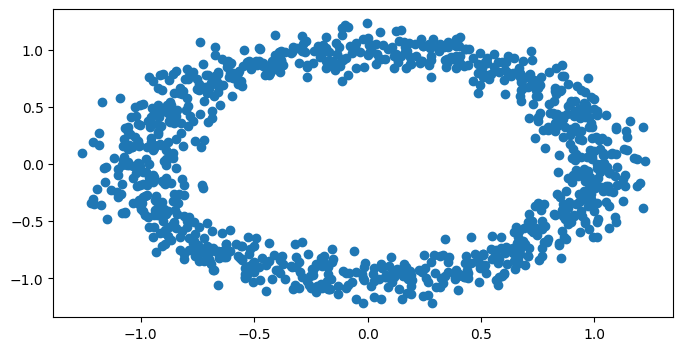

In [4]:
# Plot original and generated points
plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')

In [5]:
# Convert data to PyTorch tensor
data = torch.tensor(data, dtype=torch.float32)

In [6]:
# Define the VAE architecture
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2 * 2)  # 2 for mean and variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(-1, 2)
        latent = self.encoder(x)
        mu, logvar = torch.chunk(latent, 2, dim=1)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decoder(z)
        return reconstructed, mu, logvar

In [7]:
# Define the loss function
def loss_function(reconstructed, x, mu, logvar):
    # Reconstruction loss (MSE)
    mse_loss = nn.MSELoss()(reconstructed, x)
    # KL divergence loss
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse_loss + kl_loss

In [8]:
# Initialize the VAE model and optimizer
vae = VAE()
optimizer = optim.Adam(vae.parameters(), lr=0.001)

In [9]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    reconstructed, mu, logvar = vae(data)
    loss = loss_function(reconstructed, data, mu, logvar)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}] Loss: {loss.item()}")

Epoch [0/1000] Loss: 26.73271942138672
Epoch [100/1000] Loss: 0.5632174015045166
Epoch [200/1000] Loss: 0.5387319326400757
Epoch [300/1000] Loss: 0.5297881364822388
Epoch [400/1000] Loss: 0.5240316390991211
Epoch [500/1000] Loss: 0.5228298902511597
Epoch [600/1000] Loss: 0.5215058326721191
Epoch [700/1000] Loss: 0.5206931829452515
Epoch [800/1000] Loss: 0.5196908712387085
Epoch [900/1000] Loss: 0.5198109149932861


In [10]:
# Generate new points using the trained VAE
with torch.no_grad():
    z = torch.randn(100, 2)
    generated_points = vae.decoder(z).numpy()

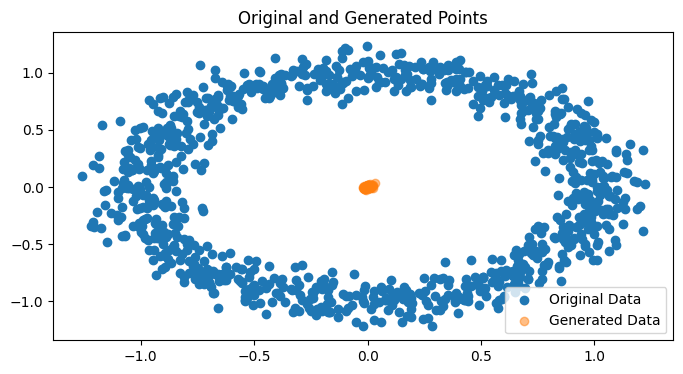

In [11]:
# Plot original and generated points
plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(generated_points[:, 0], generated_points[:, 1], label='Generated Data', alpha=0.5)
plt.legend()
plt.title('Original and Generated Points')
plt.show()

In [12]:
generated_points

array([[-1.71465855e-02, -1.77036338e-02],
       [-1.51858423e-02, -1.82169303e-03],
       [ 7.08686933e-03,  1.16475038e-02],
       [-2.23558955e-03,  1.09889545e-02],
       [-1.16274245e-02, -1.43318214e-02],
       [-1.73028465e-02, -2.64278427e-03],
       [ 6.73046056e-03, -4.33412194e-03],
       [-1.45963412e-02, -1.02073625e-02],
       [ 2.51910072e-02,  1.66469850e-02],
       [ 6.84161205e-03, -6.11323491e-03],
       [-7.58117251e-03,  4.74197417e-03],
       [ 4.34760842e-03,  1.16250291e-03],
       [-4.82481159e-03,  4.07442451e-04],
       [-2.32297182e-03,  7.54664093e-03],
       [-6.11077994e-04,  1.51199475e-02],
       [ 2.79993564e-03,  1.28114372e-02],
       [-3.48897465e-03,  1.90166757e-03],
       [ 2.26568524e-03,  2.53930688e-04],
       [ 1.03809889e-02, -9.34781879e-03],
       [ 3.37071251e-03,  2.03200877e-02],
       [ 1.60112623e-02, -6.09774888e-03],
       [ 4.56085429e-04, -3.05139646e-03],
       [-1.54734645e-02, -6.29879907e-03],
       [-8.